In [2]:
from IPython.display import Image

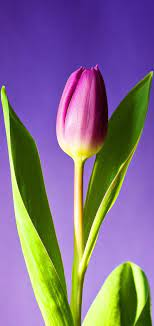

In [4]:
Image(filename='tulipflower.png', width=300) 

In [6]:
feature_dict = {i:label for i,label in zip(
 range(4),
 ('sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm', ))}

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('archive (1).zip')
df.head()

,species,petal length,petal width,sepal length,sepal width
0,Tulip Tarda,4.7,1.4,7.0,3.2
1,Tulip Tarda,4.5,1.5,6.4,3.2
2,Tulip Tarda,4.9,1.5,6.9,3.1
3,Tulip Tarda,4.0,1.3,5.5,2.3
4,Tulip Tarda,4.6,1.5,6.5,2.8


In [11]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:,0:4].values
y = df['species'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: 'Tarda', 2: 'Clusiana', 3:'Acuminata'}

In [12]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([[<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>],
       [<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>]], dtype=object)

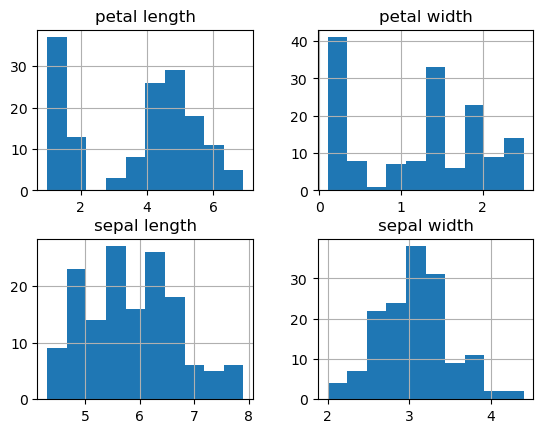

In [13]:
df.hist()

In [14]:
import numpy as np
import pandas as pd

In [15]:
data = pd.read_csv('archive (1).zip')

In [16]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 2].values

In [17]:
np.set_printoptions(precision=4)
mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [3.6286 1.     5.4143 2.3714]

Mean Vector class 2: [5.55   2.     6.65   3.0167]

Mean Vector class 3: [nan nan nan nan]



C:\Users\Rithika Patil\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [18]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4)) # scatter matrix for ev
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat # sum class scatter mat
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[3.7093 0.     4.3221 0.8907]
 [0.     0.     0.     0.    ]
 [4.3221 0.     5.9036 1.7079]
 [0.8907 0.     1.7079 1.3426]]


In [19]:
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors): 
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_excel('salary.xlsx')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [22]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dtype: int64

In [27]:
df.columns = df.columns.str.replace('.', '_')

In [28]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (11249, 8)

Training data-y- Shape:	 (11249, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (3750, 8)

Testing data(y-Outcome) Shape:	 (3750, 1)


# Model Development with Logistic Regression Algorithm

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 ['low' 'low' 'medium' ... 'low' 'medium' 'low']

Testing is completed

Testing samples are: 	 3750
********************Performance Measures for Logistic Regression Classification**********
Accuracy Score:	
 0.5077333333333334

Confusion Matrix:
 [[   0  201   93]
 [   0 1503  354]
 [   0 1198  401]]



C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00       294
         low       0.52      0.81      0.63      1857
      medium       0.47      0.25      0.33      1599

    accuracy                           0.51      3750
   macro avg       0.33      0.35      0.32      3750
weighted avg       0.46      0.51      0.45      3750



C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

# Feature Engineering Techniques - Scaling

In [32]:
x.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0


In [33]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
sc_x=std_sc.fit_transform(x)

In [34]:
sc_x

array([[-0.9365, -1.0873, -1.4629, ..., -0.4112,  1.7889, -0.1474],
       [ 0.7528,  0.8407,  0.9711, ..., -0.4112,  1.7889, -0.1474],
       [-2.0225,  0.9576,  2.5938, ..., -0.4112,  1.7889, -0.1474],
       ...,
       [-0.9767, -1.0873, -1.4629, ..., -0.4112,  1.7889, -0.1474],
       [-2.0225,  1.4249,  1.7824, ..., -0.4112,  1.7889, -0.1474],
       [-0.9767, -1.1457, -1.4629, ..., -0.4112,  1.7889, -0.1474]])

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (11249, 8)

Training data-y- Shape:	 (11249, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (3750, 8)

Testing data(y-Outcome) Shape:	 (3750, 1)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 ['low' 'low' 'medium' ... 'low' 'medium' 'low']

Testing is completed

Testing samples are: 	 3750
********************Performance Measures for Logistic Regression Classification**********
Accuracy Score:	
 0.5074666666666666

Confusion Matrix:
 [[   0  202   92]
 [   0 1504  353]
 [   0 1200  399]]

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00       294
         low       0.52      0.81      0.63      1857
      medium       0.47      0.25      0.33      1599

    accuracy                           0.51      3750
   macro avg       0.33      0.35      0.32      3750
weighted avg       0.46      0.51      0.45      3750



C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

In [37]:
from sklearn.preprocessing import MinMaxScaler
mm_sc=MinMaxScaler()
mm_x=mm_sc.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mm_x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (11249, 8)

Training data-y- Shape:	 (11249, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (3750, 8)

Testing data(y-Outcome) Shape:	 (3750, 1)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('********************Performance Measures for Logistic Regression Classification**********')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)

Training the model

[LibLinear]Predicted Label for the input samples:
 ['low' 'low' 'medium' ... 'low' 'medium' 'low']

Testing is completed

Testing samples are: 	 3750
********************Performance Measures for Logistic Regression Classification**********
Accuracy Score:	
 0.5072

Confusion Matrix:
 [[   0  200   94]
 [   0 1503  354]
 [   0 1200  399]]

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00       294
         low       0.52      0.81      0.63      1857
      medium       0.47      0.25      0.33      1599

    accuracy                           0.51      3750
   macro avg       0.33      0.35      0.32      3750
weighted avg       0.46      0.51      0.45      3750



C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

# 2. Feature Engineering Techniques - Handling the imbalance data

<Axes: ylabel='count'>

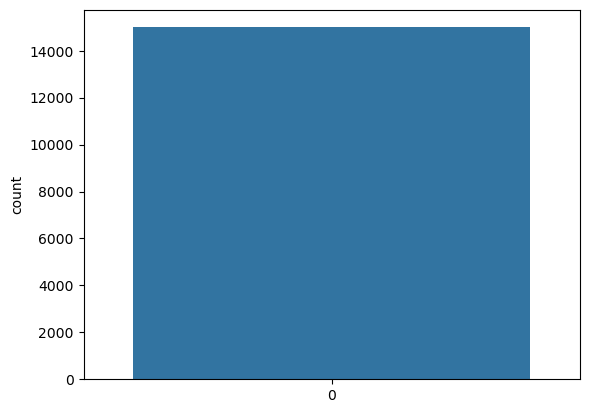

In [39]:
sns.countplot(data['number_project'])